# Luxury Watch

**Column Details**
* Brand: The brand of the watch.
* Model: The model name or number of the watch.
* Case Material: The material used to make the watch case (e.g., stainless steel, titanium, gold).
* Strap Material: The material used to make the watch strap or bracelet (e.g., leather, rubber, metal).
* Movement Type: The type of movement used in the watch (e.g., automatic, manual, quartz).
* Water Resistance: The level of water resistance for the watch (e.g., 30 meters, 100 meters, 600 meters).
* Case Diameter (mm): The diameter of the watch case in millimeters.
* Case Thickness (mm): The thickness of the watch case in millimeters.
* Band Width (mm): The width of the watch strap or bracelet in millimeters.
* Dial Color: The color of the watch dial (e.g., black, blue, silver).
* Crystal Material: The material used for the watch crystal (e.g., sapphire, mineral, hardlex).
* Complications: Any additional functions or features beyond timekeeping (e.g., date display, chronograph, GMT).
* Power Reserve: The amount of time the watch can run without winding or wearing (e.g., 48 hours, 72 hours).
* Price (USD): The retail price of the watch in US dollars.

In [41]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Luxurywatch.csv"

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary

In [43]:
df = pd.read_csv(path)

In [44]:
df

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,"2,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Breguet,Classique,18k Rose Gold,Leather,Automatic,30 meters,38.5,8.25,20.0,White,Sapphire,Date,38 hours,"21,500"
503,Blancpain,Fifty Fathoms,Stainless Steel,Fabric,Automatic,300 meters,45.0,15.50,23.0,Black,Sapphire,Date,120 hours,"13,500"
504,Longines,Master Collection,Stainless Steel,Leather,Automatic,30 meters,38.5,9.70,20.0,Blue,Sapphire,Date,64 hours,"1,800"
505,Vacheron Constantin,Overseas,Stainless Steel,Stainless Steel,Automatic,150 meters,41.5,11.00,22.0,Blue,Sapphire,Date,40 hours,"19,000"


In [45]:
dfSummary(df)
#utilizzo dfSummary per avere un overview generale, noto che ci sono molti other

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Brand[object],1. IWC2. Audemars Piguet3. Patek Philippe4. Zenith5. Blancpain6. Rolex7. Breguet8. Hublot9. Panerai10. Vacheron Constantin11. other,39 (7.7%)38 (7.5%)33 (6.5%)30 (5.9%)29 (5.7%)27 (5.3%)26 (5.1%)26 (5.1%)25 (4.9%)25 (4.9%)209 (41.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADx0lEQVR4nO3cMWobQQCG0VEQIWkkjMGH8SFy2BxCtzHGW8QmjVKkDdYIrT/D5r1aBgU+Ruwyf3bn83lA4ctnfwH+H2IjIzYyYiMjNjJiIyM2MmIjIzYyuzHG9zHG1yv+5vf5fH79oO/Dhu3v7+9/HA6Hu9k/WJblebfb/RQc19ofDoe7x8fH1+Px+Hbpwy8vL99Op9Pd09PT1zGG2LjKfowxjsfj28PDw6/Jv/n+gd+HDfOAQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPZj/L2nNvPh2c/Bv+yXZXk+nU53Y/Ke2rIsz2OM3x/7tdgiGwQyO/9lFhUnGxnrKjLWVWSsq8h4qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZ18LJGLyQueZkc6Jxk+nBi6ELt5oavBi6sIZrBi+GLtzES10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyU4MXQxfWMD14MXThVq6FkzF4IeMBgczsz6ifUG42ta6yrGINF9dVllWsZXZdZVnFzTwgkBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbm4rrKsYi1T6yrLKtbgWjgZ6yoyTjYyBi9kDF7IGLyQ8VKXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMq6FkzF4ITNzsjnVWMXFwYuxC2t5d/Bi7MKaZgYvxi6swktdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIj8+66yrKKNV1cV1lWsRYbBDLWVWScbGSsq8hYV5GxriLjpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kXAsnY/BCxslGxuCFjMELGYMXMl7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsa1cDIGL2Q8IJDxM0rGuoqMdRUZ6yoyHhDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i41o4GesqMk42MgYvZAxeyBi8kPFSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKuhZMxeCEzc7JtnZM7cnHwsnUGPZ13By9bZ9DTmhm8bJ1BT8RLXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLvDl627n/9d3+Wi4OXrTPo6bgW7lp4xuCFjAcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwAlNk7iQmdo9QAAAABJRU5ErkJggg=="">",0(0.0%)
2,Model[object],1. Royal Oak2. Fifty Fathoms3. Nautilus4. Classique5. Portugieser6. Overseas7. Laureato8. El Primero9. Big Bang10. Speedmaster11. other,38 (7.5%)29 (5.7%)26 (5.1%)24 (4.7%)24 (4.7%)21 (4.1%)20 (3.9%)19 (3.7%)18 (3.6%)15 (3.0%)273 (53.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD+klEQVR4nO3dQWobWQBF0a9GhM5Ewhi8GC+iF9uL0G6McQ06IRP1oIeRSiXydQPuc8YSCHMpUcV/1u58Pg8o/PG7PwD/H2IjIzYyYiMjNjJiIyM2MmIjIzYyuzHG1zHGlzve8+N8Pn970OfhE9s/Pz//dTgcnra+YVmW991u97fguNf+cDg8vb6+fjsej99vvfjj4+PP0+n09Pb29mWMITbush9jjOPx+P3l5eWfje/5+sDPwyfmBoGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mjsx/jvnNqWF299HVyyX5bl/XQ6PY2N59SWZXkfY/x47MfiM7JBILPzL7OobL2yuZrxyzatqyyqmOHmusqiilm2rqssqvhlHuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRuTl4MXJhlk2DFyMXZnAsnIzBC5ktVzZXNaa4OXgxdmGW1cGLsQszbRm8GLswhYe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZFYHL8YuzHRz8GLswiyOhZMxeCHjBoHMra9RX6FMs7qusqxipqvrKssqZru1rrKsYho3CGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGSurqssq5htdV1lWcVMjoWTsa4i48pGxuCFjMELGYMXMh7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2TWrmyuakx1dfBi7MJsFwcvxi48wtrgxdiFqTzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MhfXVZZVPMLVdZVlFbPZIJCxriLjykbGuoqMdRUZ6yoyHuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZFzZyBi8kDF4IWPwQsZDXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4Fk7G4IWMGwQyvkbJWFeRsa4iY11Fxg0CGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGesqMtZVZBwLJ2NdRebalc1VjekuDl6MXXiEnwYvxi48yrXBi7EL03moS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuanwYuxC49ycfBi7MIjOBZOxuCFzNqUj/v5Rlhx9RdeuJ+h0LqLv/DC/QyFblv7hRfuZyi0wkNdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mhd/4YX7+RvedvUXXrifodA6x8Lncix8hcELGTcIZMRGRmxkxEZGbGTERkZsZMRGRmxk/gWw8k7iSHqntQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Case Material[object],1. Stainless Steel2. Titanium3. Rose Gold4. 18k Rose Gold5. Ceramic6. White Gold7. 18k White Gold8. 18K White Gold9. 18K Rose Gold10. Carbon Fiber11. other,404 (79.7%)37 (7.3%)12 (2.4%)10 (2.0%)9 (1.8%)9 (1.8%)7 (1.4%)5 (1.0%)3 (0.6%)3 (0.6%)8 (1.6%),"<img src = ""d

In [46]:
df.isna().sum()

Brand                    0
Model                    0
Case Material            0
Strap Material           0
Movement Type            0
Water Resistance         0
Case Diameter (mm)       0
Case Thickness (mm)      0
Band Width (mm)          0
Dial Color               0
Crystal Material         0
Complications          122
Power Reserve           14
Price (USD)              1
dtype: int64

In [47]:
df.dtypes

Brand                   object
Model                   object
Case Material           object
Strap Material          object
Movement Type           object
Water Resistance        object
Case Diameter (mm)     float64
Case Thickness (mm)    float64
Band Width (mm)        float64
Dial Color              object
Crystal Material        object
Complications           object
Power Reserve           object
Price (USD)             object
dtype: object

In [48]:
df['Power Reserve'].value_counts()

Power Reserve
60 hours     82
42 hours     55
70 hours     50
50 hours     40
72 hours     38
120 hours    30
45 hours     29
48 hours     27
38 hours     27
40 hours     22
54 hours     15
46 hours     13
65 hours     11
55 hours     10
44 hours     10
56 hours      8
64 hours      6
68 hours      6
43 hours      5
80 hours      4
41 hours      1
4,200         1
210 days      1
270 days      1
168 hours     1
Name: count, dtype: int64

In [49]:
df['Water Resistance'].value_counts()

Water Resistance
100 meters     130
50 meters      112
30 meters      104
300 meters      63
200 meters      29
120 meters      26
150 meters      20
60 meters       13
1000 meters      4
500 meters       3
600 meters       2
2000 meters      1
Name: count, dtype: int64

In [50]:
df['Water Resistance'] = df['Water Resistance'].str.replace(' meters','').astype('float')

In [51]:
#faccio pulizia dato su power reserve
df['Power Reserve'] = df['Power Reserve'].str.replace('210 days','5040').str.replace('270 days','6480').str.replace(',','').str.replace(' hours','').astype('float')

In [52]:
df['Power Reserve'] = df['Power Reserve'].fillna(df['Power Reserve'].median())

In [53]:
#sostituisco la virgola a trasformo il data type della colonna

df['Price (USD)'] = df['Price (USD)'].str.replace(',','').astype('float')

In [54]:
df['Price (USD)'] = df['Price (USD)'].fillna(df['Price (USD)'].median())

In [55]:
df['Complications'].value_counts()

Complications
Date                               234
Chronograph                         78
Chronograph, Date                   10
Date, Chronograph                    9
Chronograph, Tachymeter              7
GMT, Date                            5
Date, Power Reserve Indicator        4
Date, Moonphase                      4
Date, Power Reserve                  4
Date, GMT                            4
GMT                                  4
Date, Moon Phase                     2
Date, World Time                     2
Date, Second Time Zone               2
Date, Stopwatch                      2
Date, Unidirectional Bezel           1
Date, Cyclops                        1
Dual Time Zone                       1
Date, Chronograph, Moon Phase        1
Date, Sub Seconds                    1
Date, Cyclops Lens                   1
Date, Rotating Bezel                 1
Chronograph, Moon Phase              1
Day/Date                             1
Power Reserve                        1
World Time,

/var/folders/r_/fs8t89rd1mzfn7vs0ld413940000gn/T/ipykernel_51889/346705747.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price (USD)'],bins=30)


<Axes: xlabel='Price (USD)', ylabel='Density'>

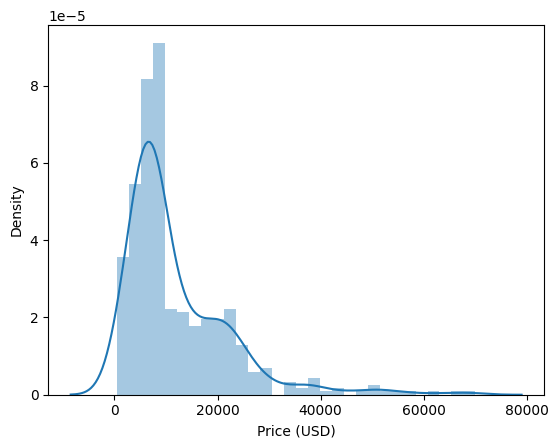

In [76]:
df['Price (USD)'] = df['Price (USD)'].apply(lambda x:float(str(x).replace(',','')))
sns.distplot(df['Price (USD)'],bins=30)

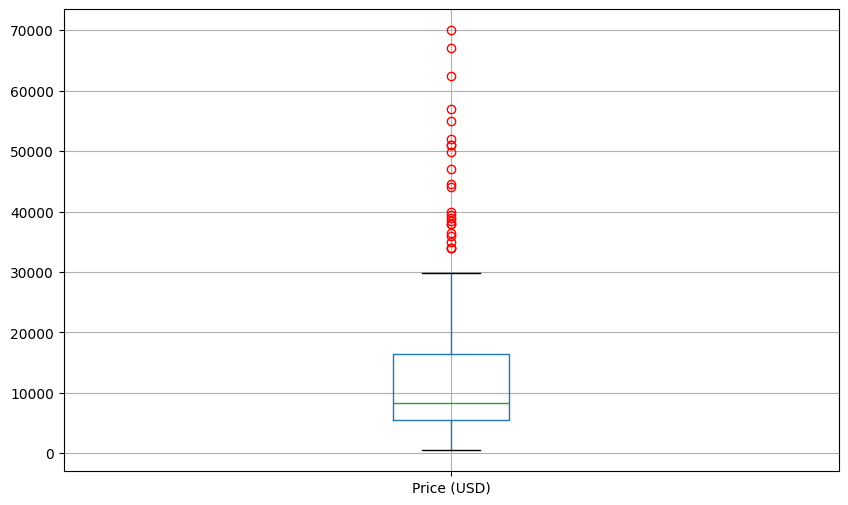

In [ ]:
plt.figure(figsize=(10, 6))
df[['Price (USD)']].boxplot(flierprops={'markeredgecolor':'red'})
plt.show()

<Axes: >

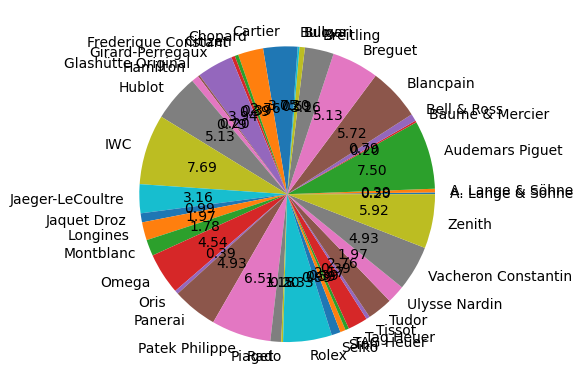

In [ ]:
df.groupby('Brand').size().plot(kind='pie', autopct='%.2f')


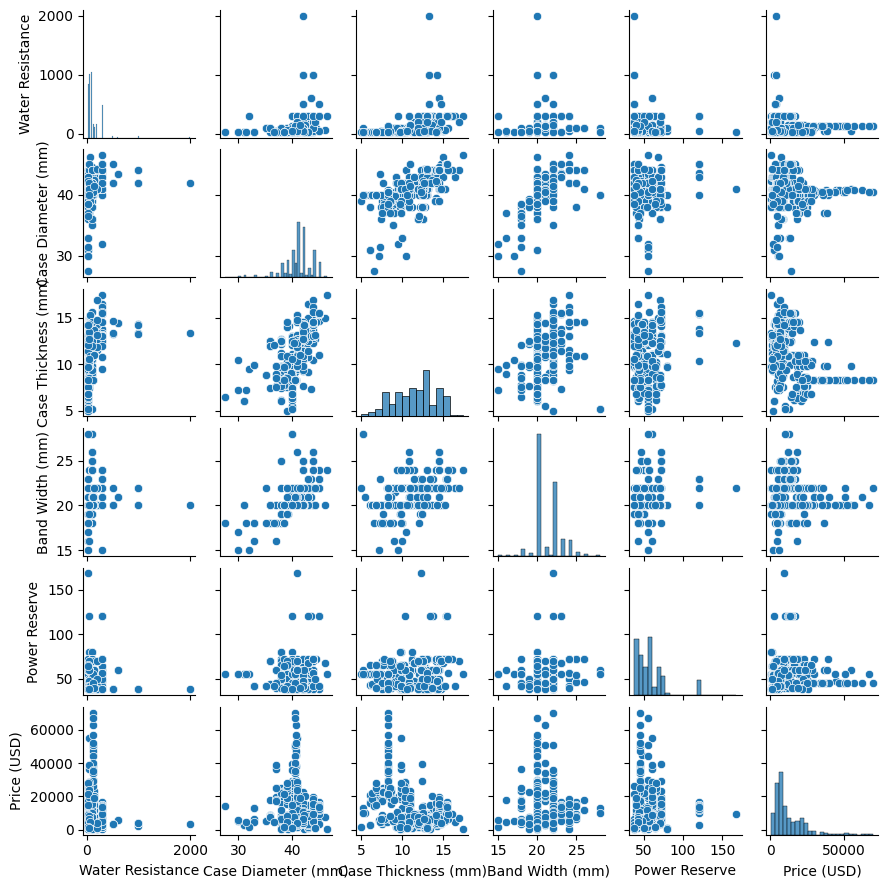

In [56]:
#tolgo dalla visualizzazione gli outlier di power reserve per vedere meglio la distribuzione
sns.pairplot(df.loc[df['Power Reserve']< 3000],height=1.5)

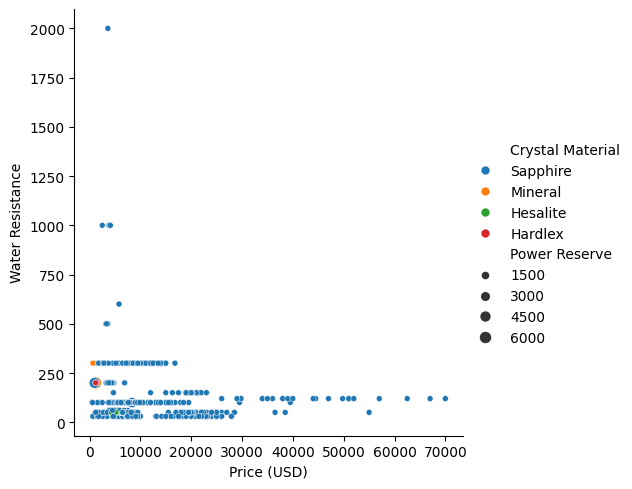

In [57]:
sns.relplot(data= df,x = 'Price (USD)', y = 'Water Resistance', size = 'Power Reserve', hue = 'Crystal Material')

In [85]:
df_top10 = df[df['Brand'].isin(['IWC','Audemars Piguet','Patek Philippe','Zenith','Blancpain','Rolex','Breguet','Hublot','Panerai','Vacheron Constantin'])]

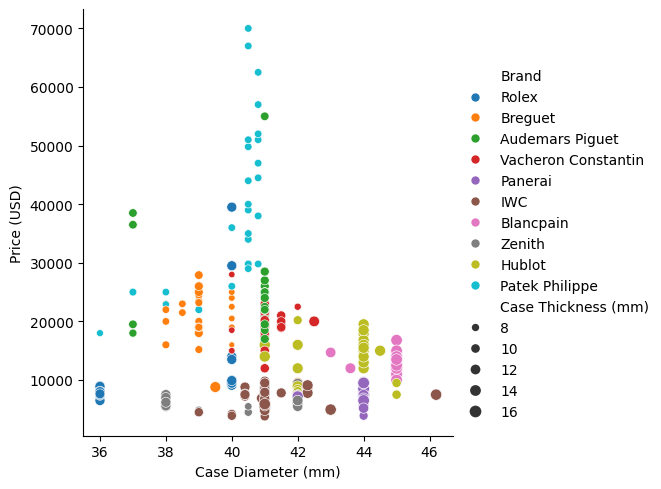

In [87]:
sns.relplot(data= df_top10,y = 'Price (USD)', x = 'Case Diameter (mm)', size = 'Case Thickness (mm)',hue = 'Brand')

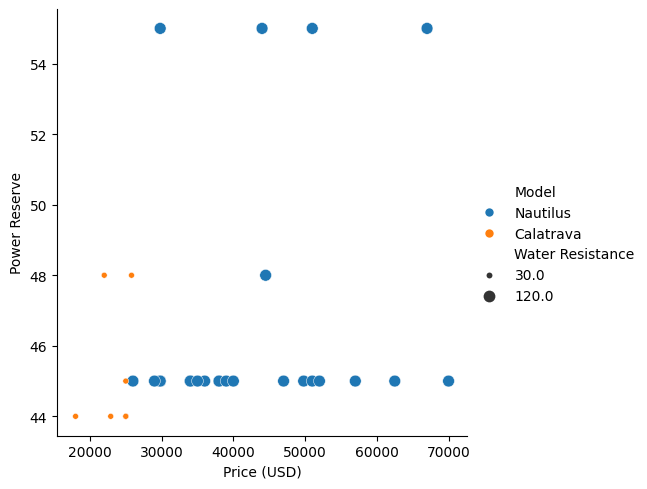

In [58]:
sns.relplot(data= df.loc[df['Brand']=='Patek Philippe'],x = 'Price (USD)', y = 'Power Reserve', size = 'Water Resistance', hue = 'Model')

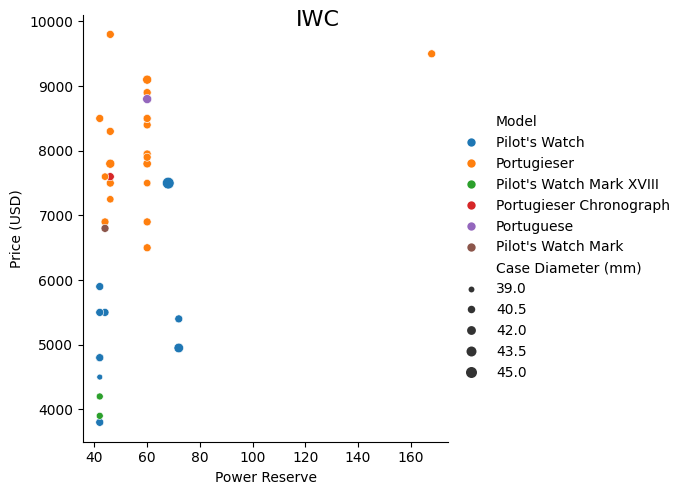

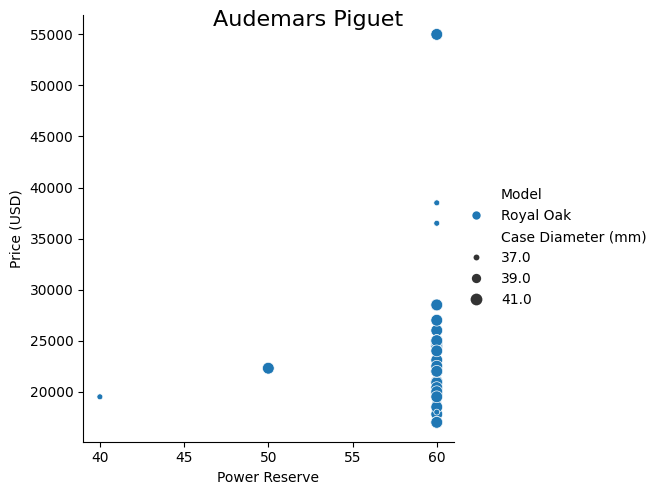

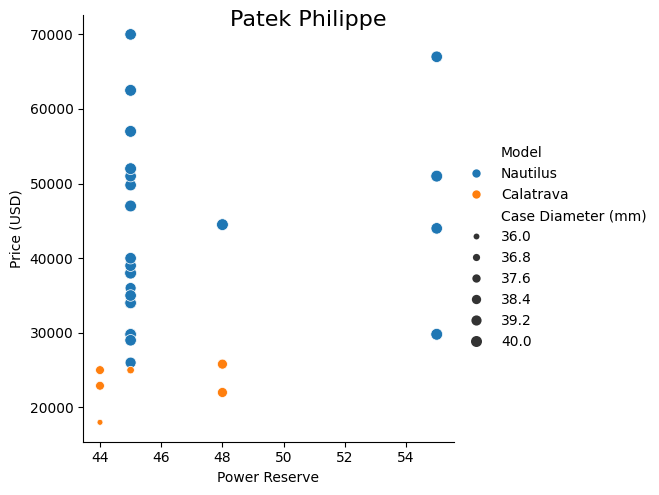

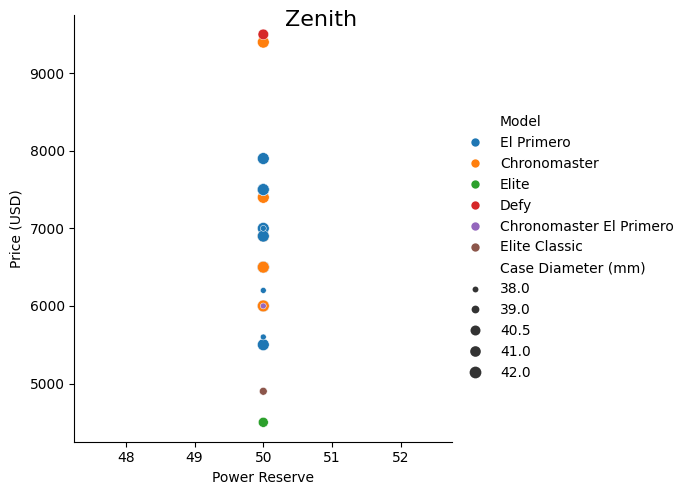

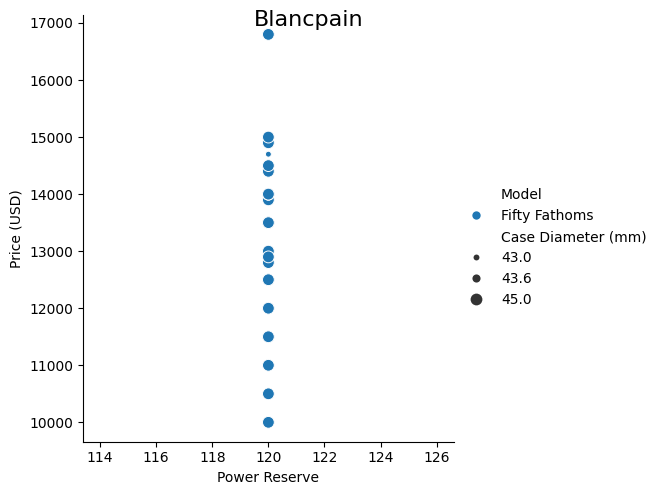

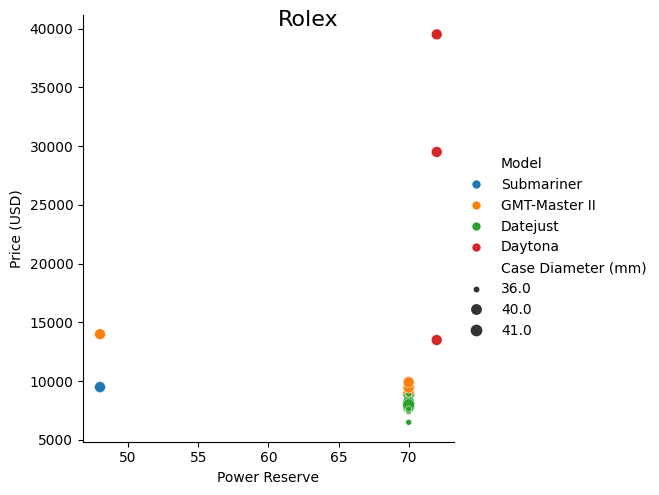

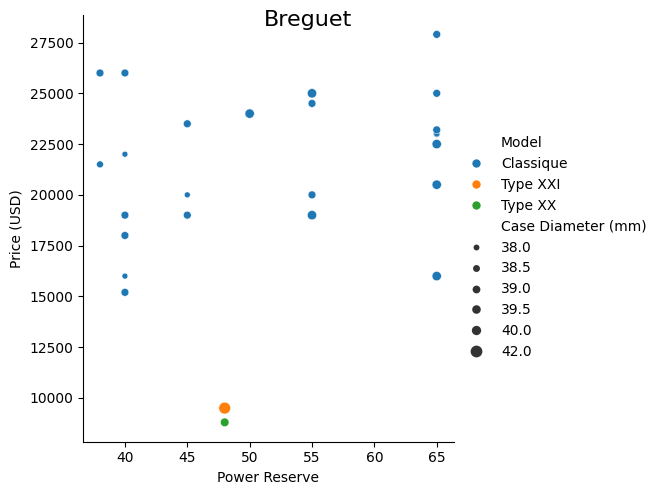

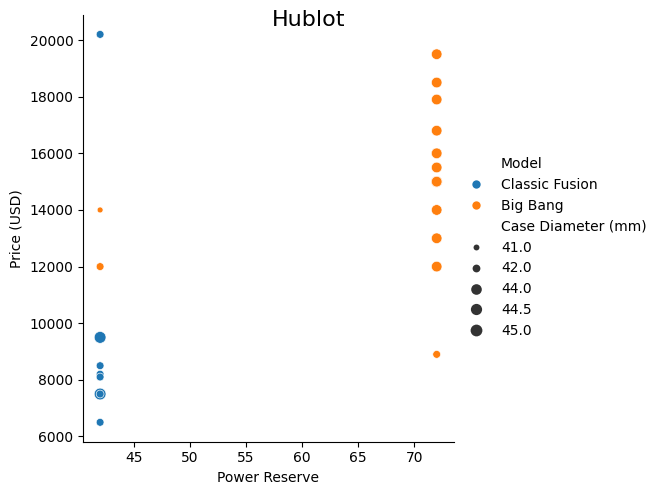

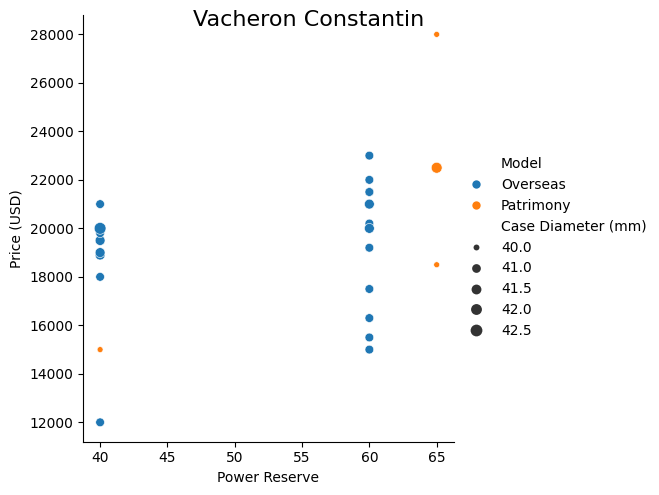

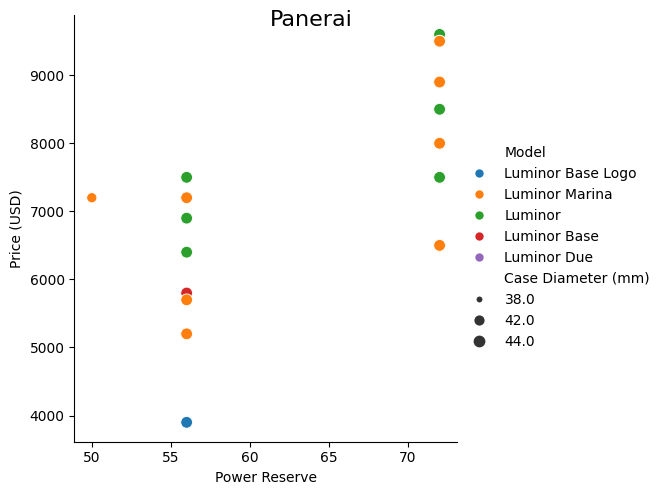

In [88]:
for i in df_top10['Brand'].value_counts().index.tolist():
    sns.relplot(data= df_top10.loc[df['Brand']==i],y = 'Price (USD)', x = 'Power Reserve', size = 'Case Diameter (mm)',hue = 'Model').fig.suptitle(f'{i}', fontsize=16)
    